#설정

In [169]:
# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [171]:
# matplot lib에서 사용 가능한 한글 폰트
import os
import sys


import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath('/content/drive/MyDrive/socar/70sEnt/'))
plt.rc('font', family='NanumBarunGothic')

In [172]:
cd /content/drive/MyDrive/socar/70sEnt/

/content/drive/MyDrive/socar/70sEnt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [174]:
from Preprocessing import data_preprocessing


# 코드 정리


In [175]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='time1'
location=None

In [176]:
ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,location)
regionA_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,"A지역")
regionB_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,"B지역")
regionC_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,"C지역")
regionD_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,"D지역")
regionE_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,"E지역")

In [9]:
cal_df = pd.read_csv('/content/drive/MyDrive/00_Aiffelton/데이터/대학 학사력/univ_calendar.csv', encoding="cp949")
cal_df = pd.DataFrame(cal_df)

# 대학 일정과 쏘카 수요 관계 분석


전체 지역의 쏘카 사용 특징 중 하나는 한 연령대의 사용량이 약 a%에 이른다는 것이다.   
즉, 전체 지역의 전체 수요는 특정 연령대 사용률에 영향을 받을 수 있다는 뜻이다.  
따라서 특정 연령대 수요와 관계성이 있을 지표 중 하나인 대학 일정을 비교하여 특정 연령대 수요 흐름을 분석하였다.

In [10]:
# 기간 추출 함수
def cal_date(df, start, end):
  df = df[df["datetime"].between(start,end)]
  df["month"] = df.datetime.dt.month
  df["day"] = df.datetime.dt.day
  return df

###연령과 전체 지역 수요 살펴보기
먼저, 연령별 수요량과 전체 지역 수요의 관계성이 있는지 확인하였다.   

In [ ]:
age_df_day = ts_df.iloc[:,0:7]
age_df_day["month"] = age_df_day.datetime.dt.month
age_df_day["day"] = age_df_day.datetime.dt.day

age_df_day_regionA = regionA_df.iloc[:,0:7]
age_df_day_regionA["month"] = age_df_day_regionA.datetime.dt.month
age_df_day_regionA["day"] = age_df_day_regionA.datetime.dt.day

age_df_day_regionB = regionB_df.iloc[:,0:7]
age_df_day_regionB["month"] = age_df_day_regionB.datetime.dt.month
age_df_day_regionB["day"] = age_df_day_regionB.datetime.dt.day

age_df_day_regionC = regionC_df.iloc[:,0:7]
age_df_day_regionC["month"] = age_df_day_regionC.datetime.dt.month
age_df_day_regionC["day"] = age_df_day_regionC.datetime.dt.day

age_df_day_regionD = regionD_df.iloc[:,0:7]
age_df_day_regionD["month"] = age_df_day_regionD.datetime.dt.month
age_df_day_regionD["day"] = age_df_day_regionD.datetime.dt.day

age_df_day_regionE = regionE_df.iloc[:,0:7]
age_df_day_regionE["month"] = age_df_day_regionE.datetime.dt.month
age_df_day_regionE["day"] = age_df_day_regionE.datetime.dt.day

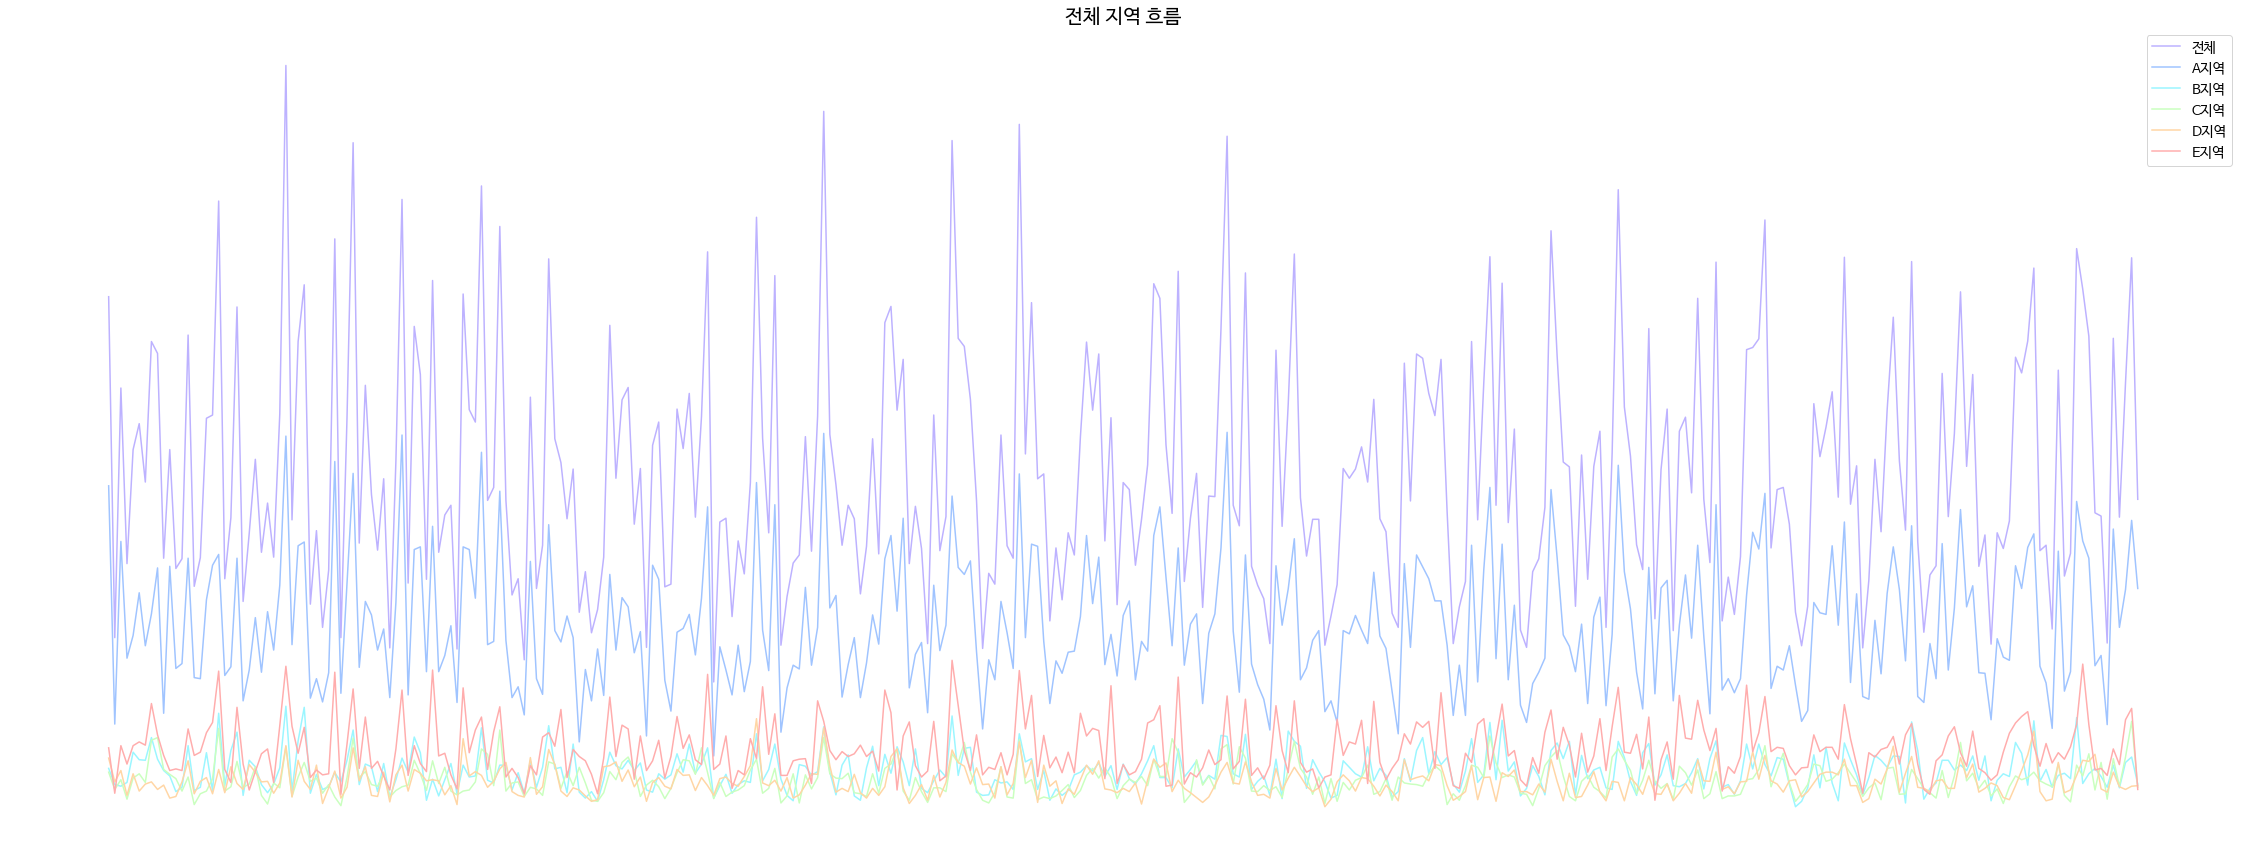

In [179]:
plt.figure(figsize=(40,15))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis,age_df_day.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#bdb2ff" , label = "전체")
plt.plot(xaxis,age_df_day_regionA.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" , label = "A지역")
plt.plot(xaxis,age_df_day_regionB.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" , label = "B지역")
plt.plot(xaxis,age_df_day_regionC.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#caffbf" , label = "C지역")
plt.plot(xaxis,age_df_day_regionD.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" , label = "D지역")
plt.plot(xaxis,age_df_day_regionE.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#ffadad" , label = "E지역")

plt.axis('off')
plt.legend(fontsize = 14)
plt.title("전체 지역 흐름", fontsize=20)

plt.show()

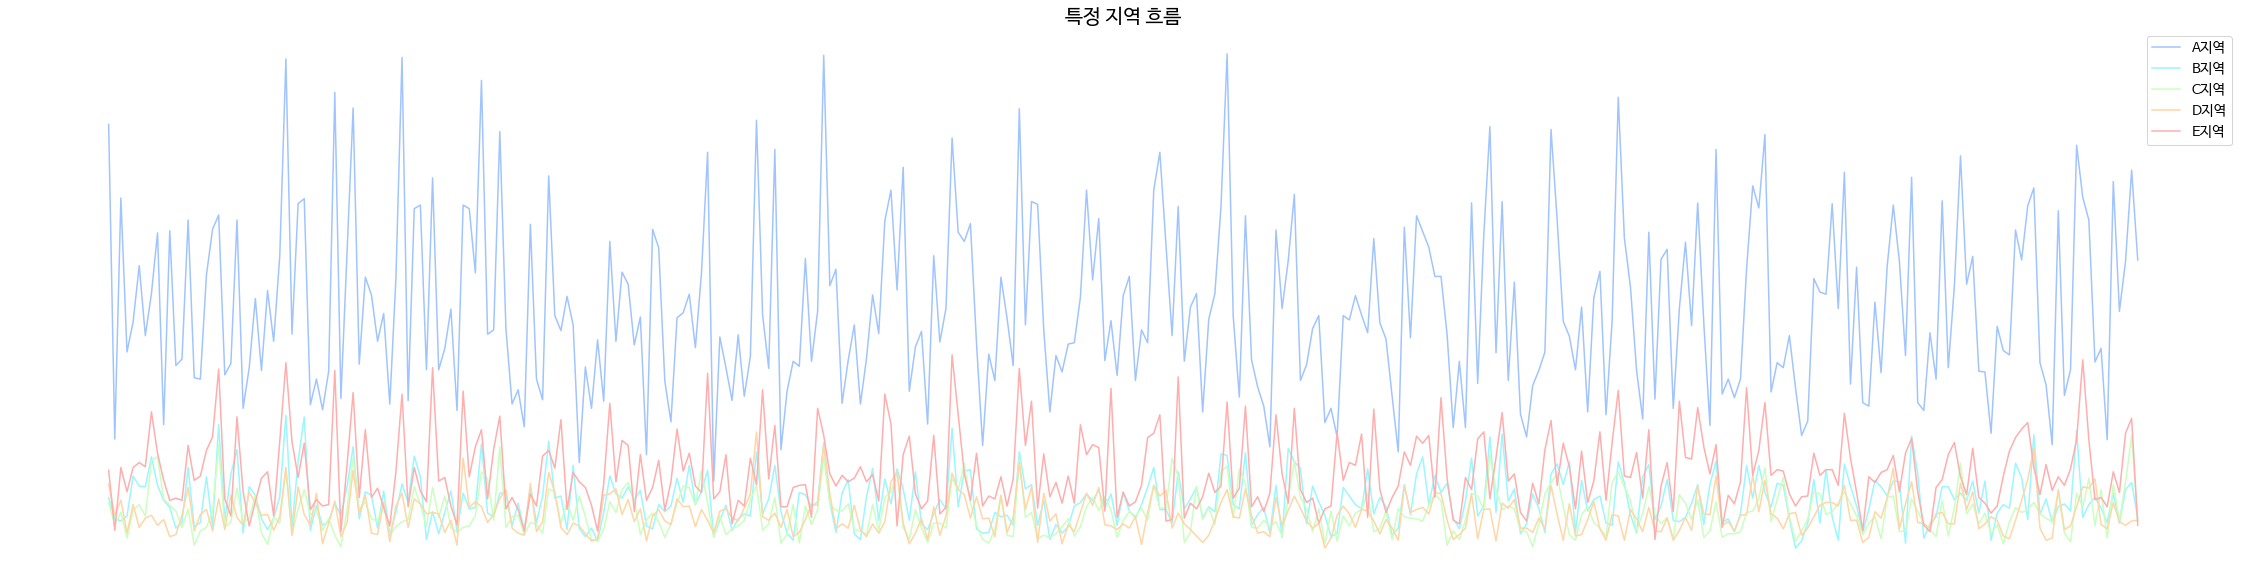

In [182]:
plt.figure(figsize=(40,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis,age_df_day_regionA.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" , label = "A지역")
plt.plot(xaxis,age_df_day_regionB.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" , label = "B지역")
plt.plot(xaxis,age_df_day_regionC.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#caffbf" , label = "C지역")
plt.plot(xaxis,age_df_day_regionD.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" , label = "D지역")
plt.plot(xaxis,age_df_day_regionE.groupby(["day","month"]).sum().reset_index().iloc[:,3], color = "#ffadad" , label = "E지역")

plt.axis('off')
plt.legend(fontsize = 14)
plt.title("특정 지역 흐름", fontsize=20)

plt.show()

## 학사일정 1  

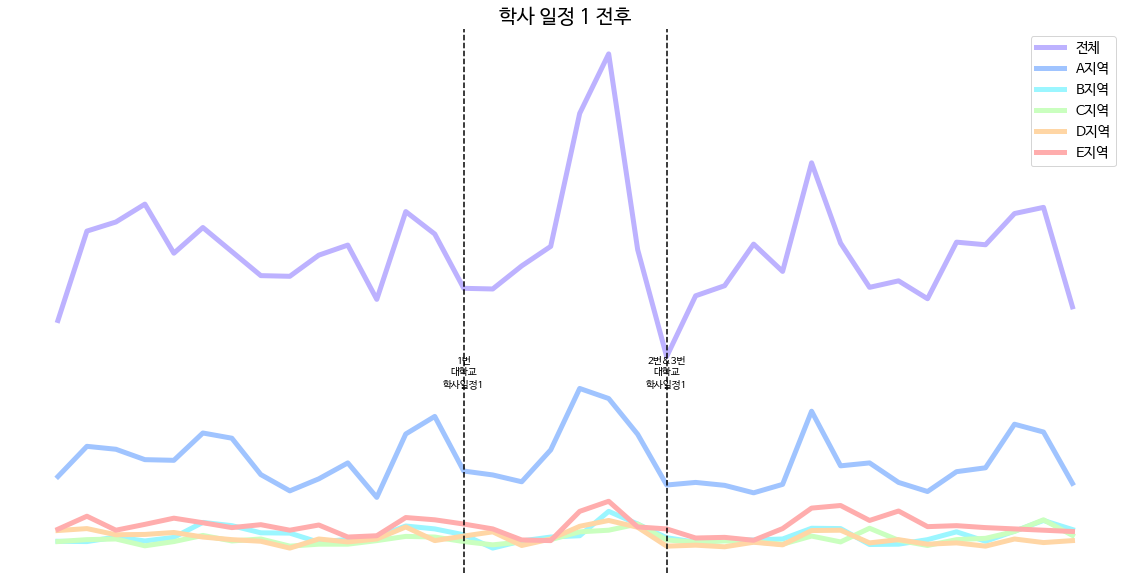

In [154]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정1_전체데이터.groupby(["month","day"]).sum().reset_index().iloc[:,2], color = "#bdb2ff" ,linewidth = 5, label = "전체")
plt.plot(xaxis, 일정1_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정1_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정1_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정1_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정1_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],500,'1번\n대학교\n학사일정1', ha = "center")
plt.axvline(x=xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],500,'2번&3번\n대학교\n학사일정1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.axis("off")
plt.title("학사 일정 1 전후",fontsize=20)
plt.legend(fontsize=14)

plt.show()

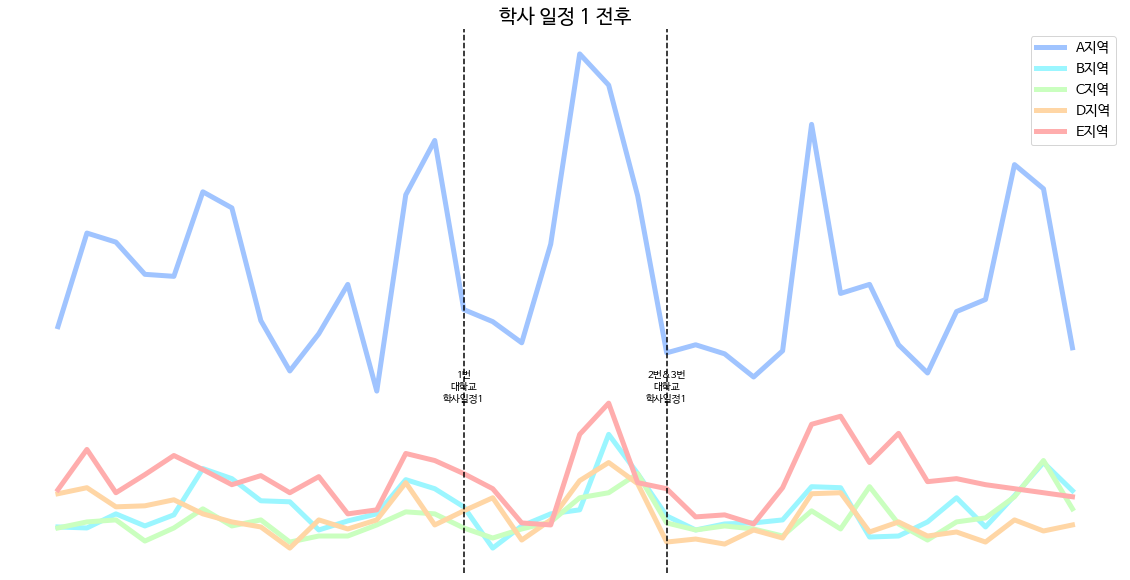

In [155]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정1_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정1_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정1_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정1_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정1_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],150,'1번\n대학교\n학사일정1', ha = "center")
plt.axvline(x=xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],150,'2번&3번\n대학교\n학사일정1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.axis("off")
plt.title("학사 일정 1 전후",fontsize=20)
plt.legend(fontsize=14)

plt.show()

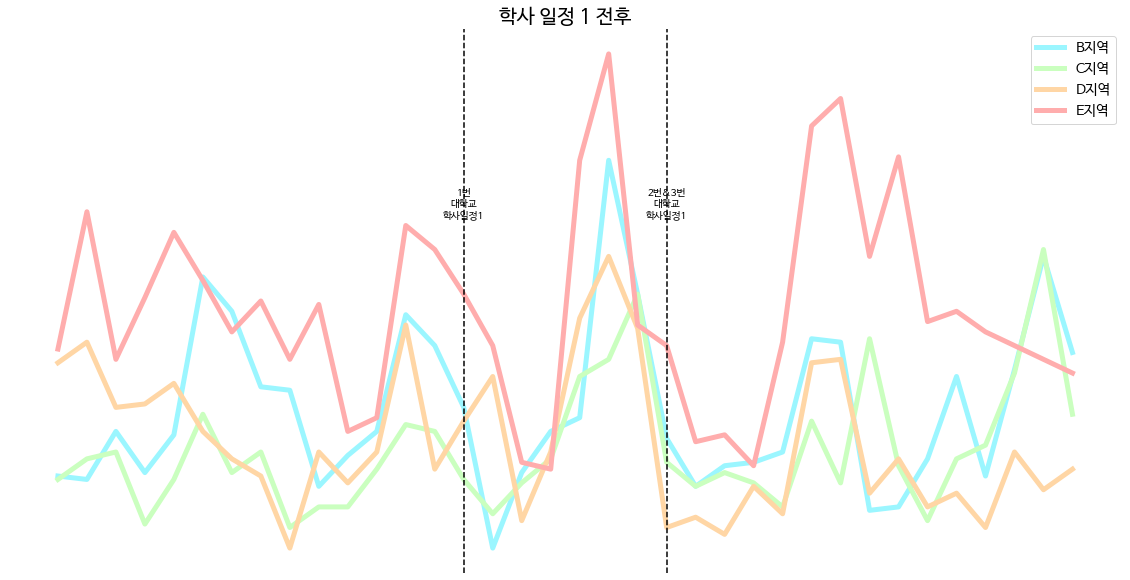

In [156]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정1_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정1_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정1_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정1_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],100,'1번\n대학교\n학사일정1', ha = "center")
plt.axvline(x=xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],100,'2번&3번\n대학교\n학사일정1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.axis("off")
plt.title("학사 일정 1 전후",fontsize=20)
plt.legend(fontsize=14)


plt.show()

## 학사 일정 2

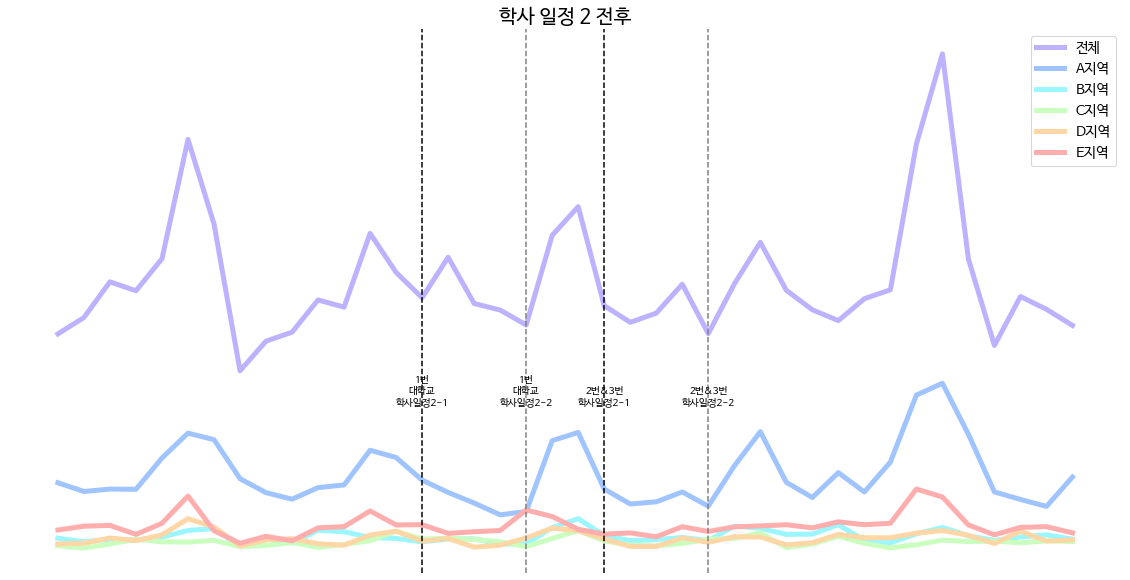

In [157]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정2_전체지역데이터.groupby(["month","day"]).sum().reset_index().iloc[:,2], color = "#bdb2ff" ,linewidth = 5, label = "전체")
plt.plot(xaxis, 일정2_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정2_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정2_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정2_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정2_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],600,'1번\n대학교\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],600,'2번&3번\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.text(xaxis[18],600,'1번\n대학교\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.text(xaxis[25],600,'2번&3번\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[25], linestyle='--', color='grey')

plt.axis('off')
plt.title("학사 일정 2 전후",fontsize=20)
plt.legend(fontsize=14)

plt.show()

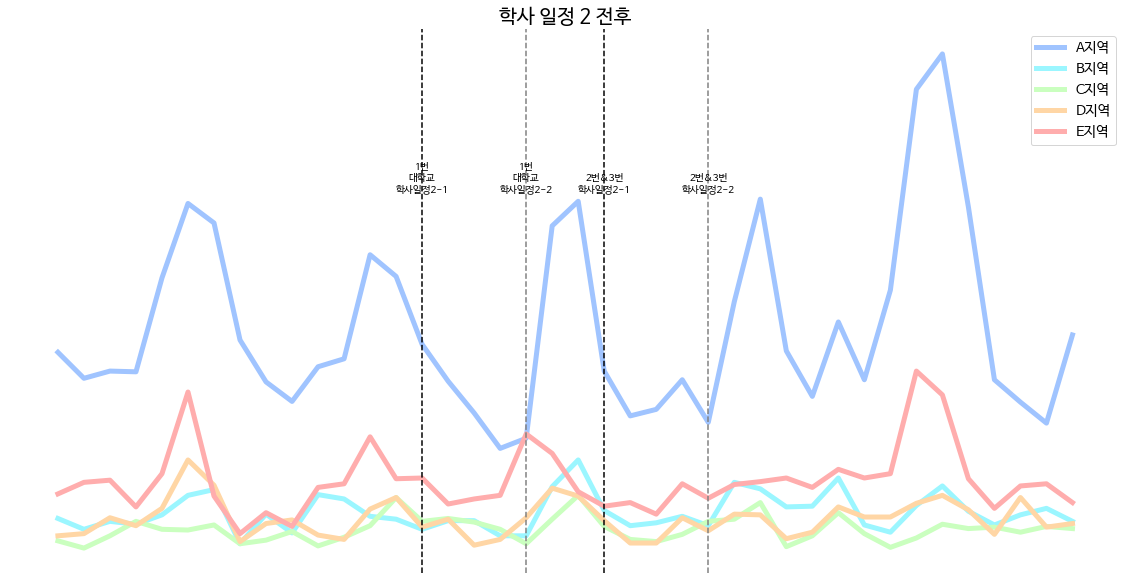

In [158]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정2_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정2_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정2_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정2_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정2_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],500,'1번\n대학교\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],500,'2번&3번\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.text(xaxis[18],500,'1번\n대학교\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.text(xaxis[25],500,'2번&3번\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[25], linestyle='--', color='grey')

plt.axis('off')
plt.title("학사 일정 2 전후",fontsize=20)
plt.legend(fontsize=14)

plt.show()

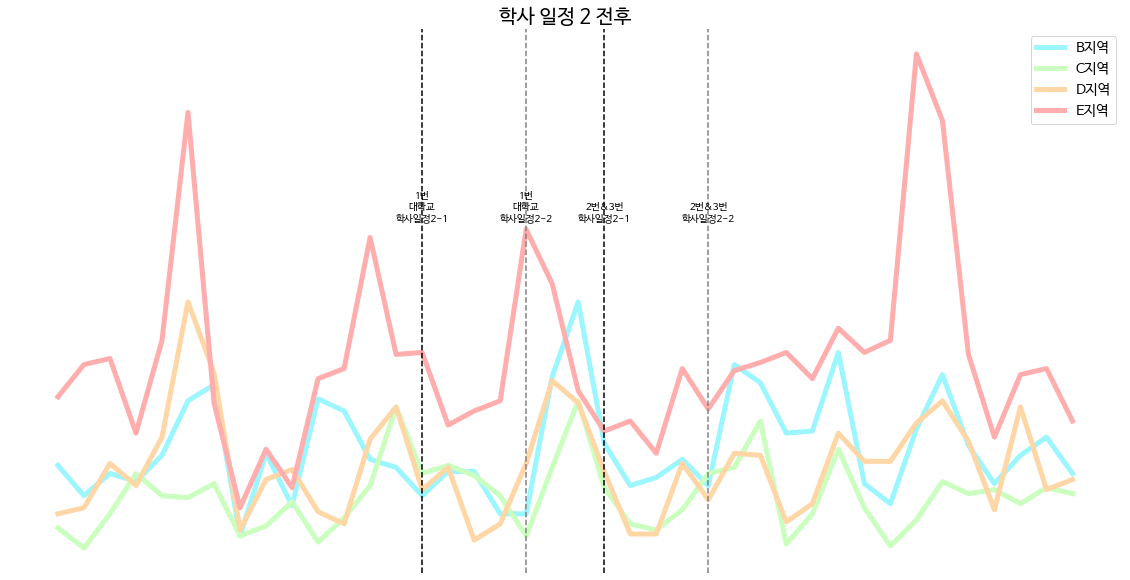

In [159]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정2_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정2_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정2_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정2_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],170,'1번\n대학교\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[21],170,'2번&3번\n학사일정2-1', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='black')

plt.text(xaxis[18],170,'1번\n대학교\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.text(xaxis[25],170,'2번&3번\n학사일정2-2', ha = "center")
plt.axvline(x= xaxis[25], linestyle='--', color='grey')

plt.axis('off')
plt.title("학사 일정 2 전후",fontsize=20)
plt.legend(fontsize=14)

plt.show()

## 학사 일정 3

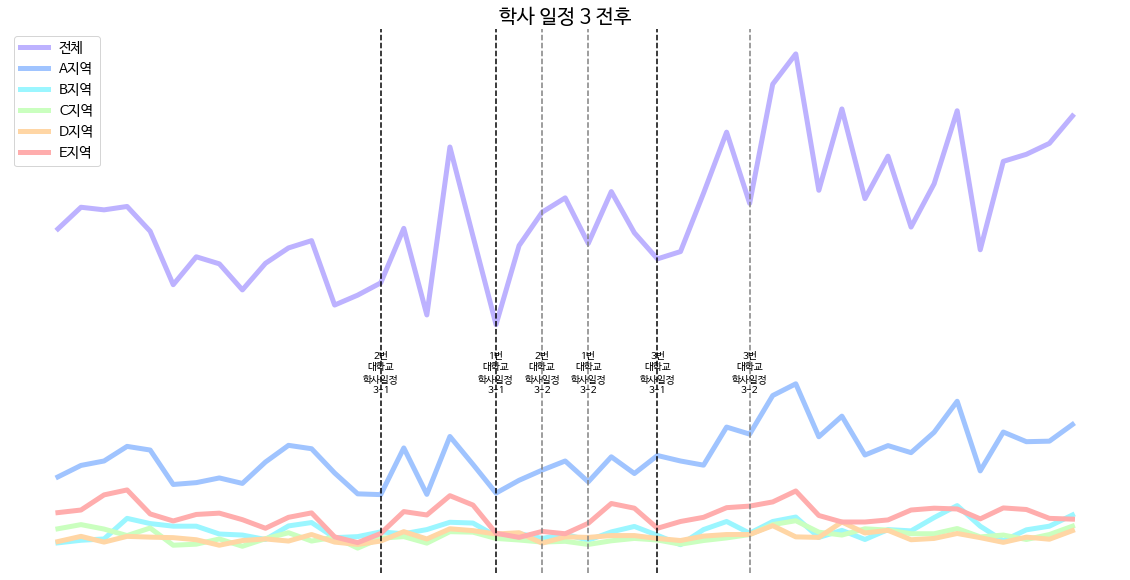

In [160]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정3_전체지역데이터.groupby(["month","day"]).sum().reset_index().iloc[:,2], color = "#bdb2ff" ,linewidth = 5, label = "전체")
plt.plot(xaxis, 일정3_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정3_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정3_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정3_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정3_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[19],600,'1번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x=xaxis[19], linestyle='--', color='black')

plt.text(xaxis[14],600,'2번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[26],600,'3번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[26], linestyle='--', color='black')

plt.text(xaxis[23],600,'1번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[23], linestyle='--', color='grey')

plt.text(xaxis[21],600,'2번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='grey')

plt.text(xaxis[30],600,'3번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[30], linestyle='--', color='grey')

plt.title("학사 일정 3 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

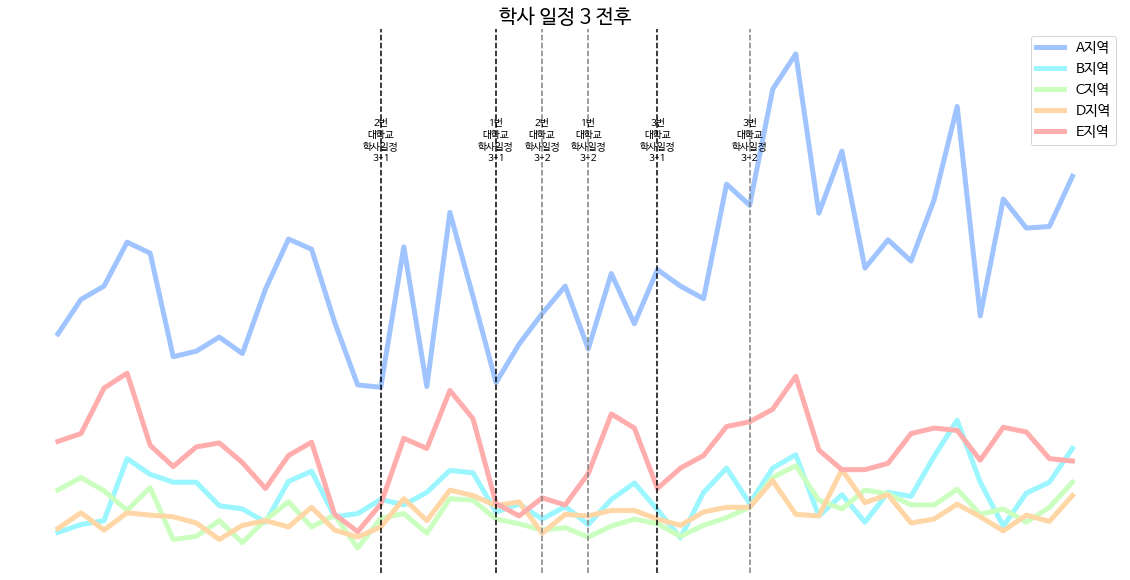

In [161]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정3_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정3_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정3_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정3_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정3_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[19],500,'1번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x=xaxis[19], linestyle='--', color='black')

plt.text(xaxis[14],500,'2번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[26],500,'3번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[26], linestyle='--', color='black')

plt.text(xaxis[23],500,'1번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[23], linestyle='--', color='grey')

plt.text(xaxis[21],500,'2번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='grey')

plt.text(xaxis[30],500,'3번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[30], linestyle='--', color='grey')

plt.title("학사 일정 3 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

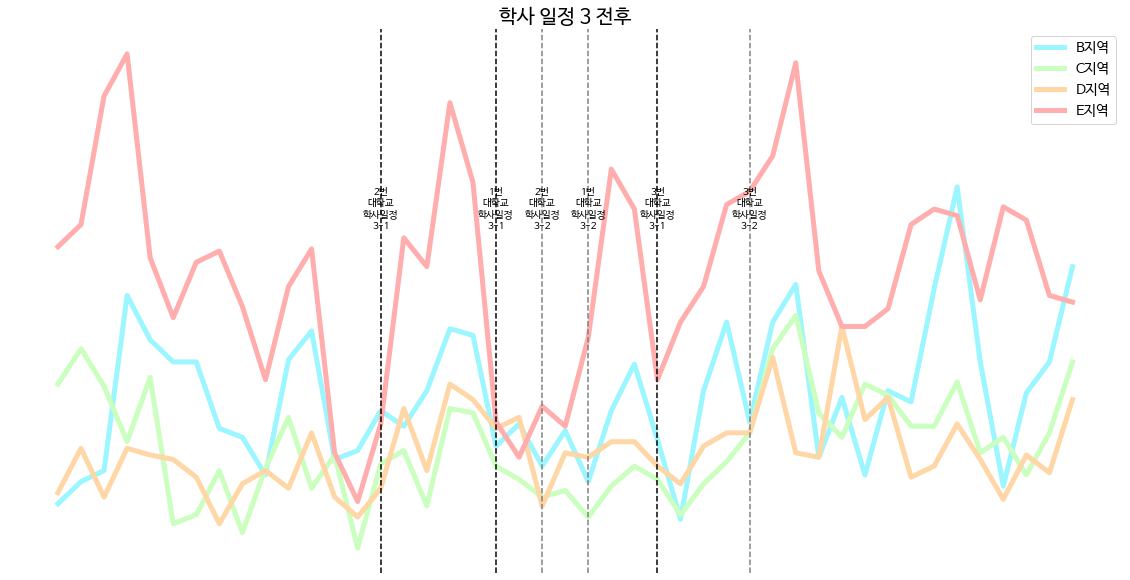

In [162]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정3_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정3_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정3_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정3_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[19],150,'1번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x=xaxis[19], linestyle='--', color='black')

plt.text(xaxis[14],150,'2번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[26],150,'3번\n대학교\n학사일정\n3-1', ha = "center")
plt.axvline(x= xaxis[26], linestyle='--', color='black')

plt.text(xaxis[23],150,'1번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[23], linestyle='--', color='grey')

plt.text(xaxis[21],150,'2번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[21], linestyle='--', color='grey')

plt.text(xaxis[30],150,'3번\n대학교\n학사일정\n3-2', ha = "center")
plt.axvline(x= xaxis[30], linestyle='--', color='grey')

plt.title("학사 일정 3 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

## 학사 일정 4

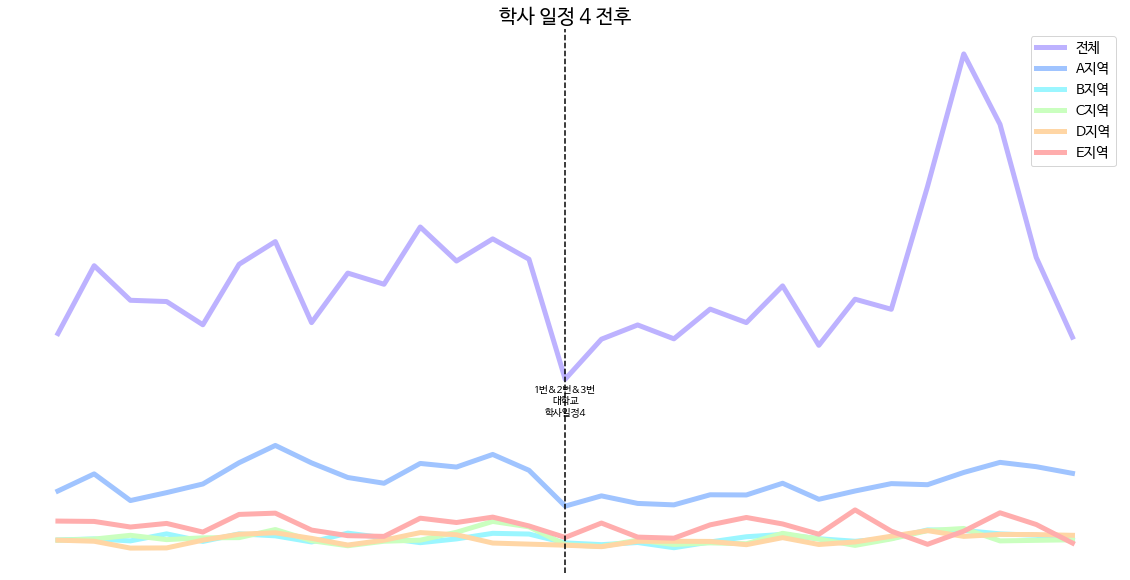

In [163]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정4_전체지역데이터.groupby(["month","day"]).sum().reset_index().iloc[:,2], color = "#bdb2ff" ,linewidth = 5, label = "전체")
plt.plot(xaxis, 일정4_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정4_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정4_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정4_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],750,'1번&2번&3번\n대학교\n학사일정4', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.title("학사 일정 4 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

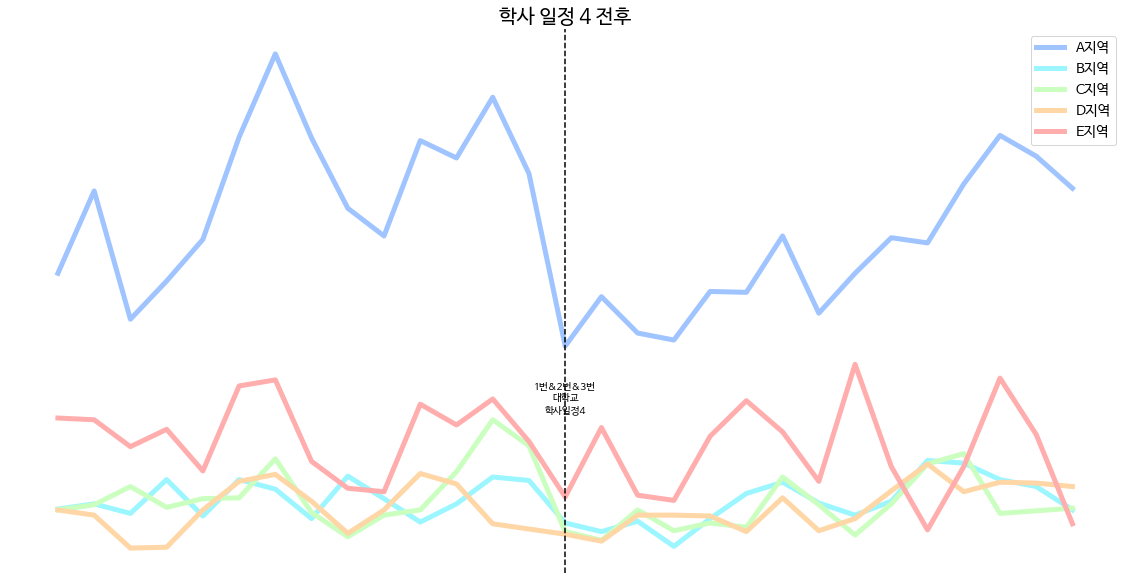

In [164]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정4_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정4_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정4_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정4_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],170,'1번&2번&3번\n대학교\n학사일정4', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.title("학사 일정 4 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

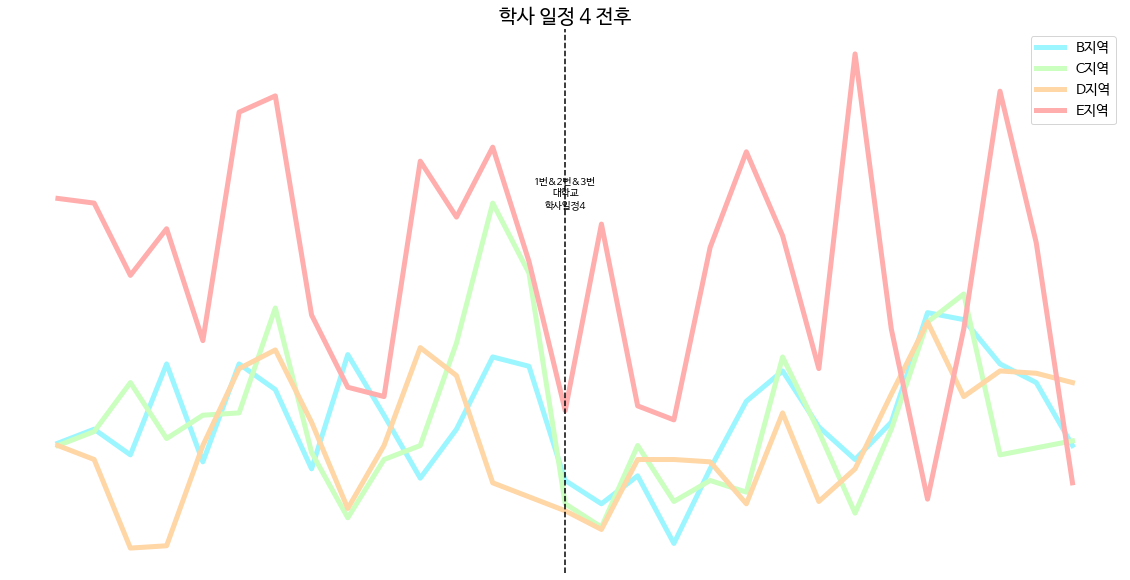

In [165]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정4_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],160,'1번&2번&3번\n대학교\n학사일정4', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.title("학사 일정 4 전후",fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

## 학사 일정 5

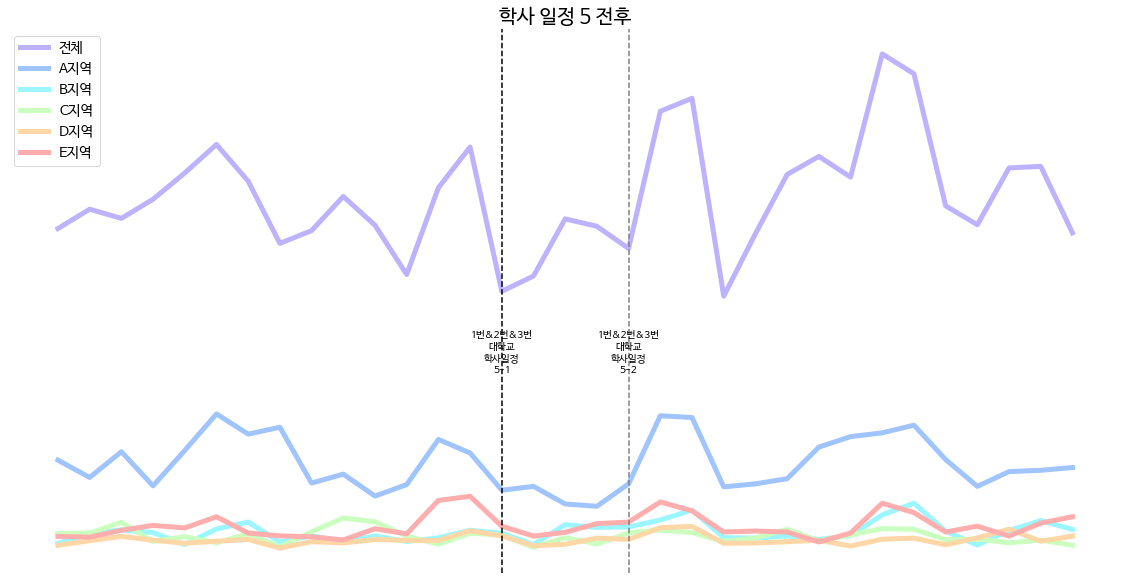

In [166]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정5_전체지역데이터.groupby(["month","day"]).sum().reset_index().iloc[:,2], color = "#bdb2ff" ,linewidth = 5, label = "전체")
plt.plot(xaxis, 일정5_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정5_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정5_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정5_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정5_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],700,'1번&2번&3번\n대학교\n학사일정\n5-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[18],700,'1번&2번&3번\n대학교\n학사일정\n5-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.title("학사 일정 5 전후", fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

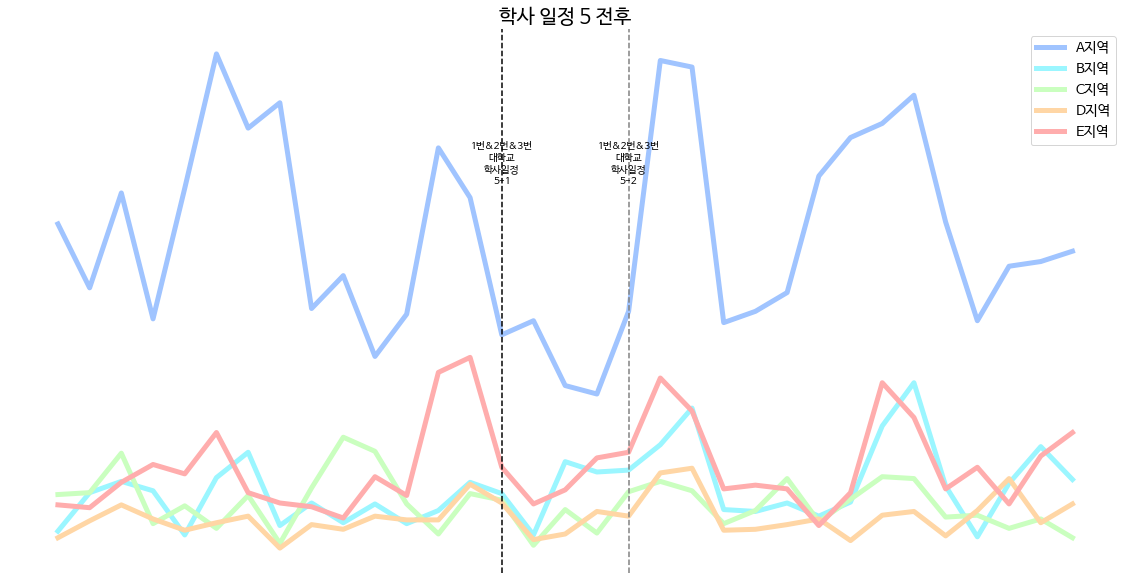

In [167]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정5_지역A데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#a0c4ff" ,linewidth = 5, label = "A지역")
plt.plot(xaxis, 일정5_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정5_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정5_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정5_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],400,'1번&2번&3번\n대학교\n학사일정\n5-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[18],400,'1번&2번&3번\n대학교\n학사일정\n5-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.title("학사 일정 5 전후", fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

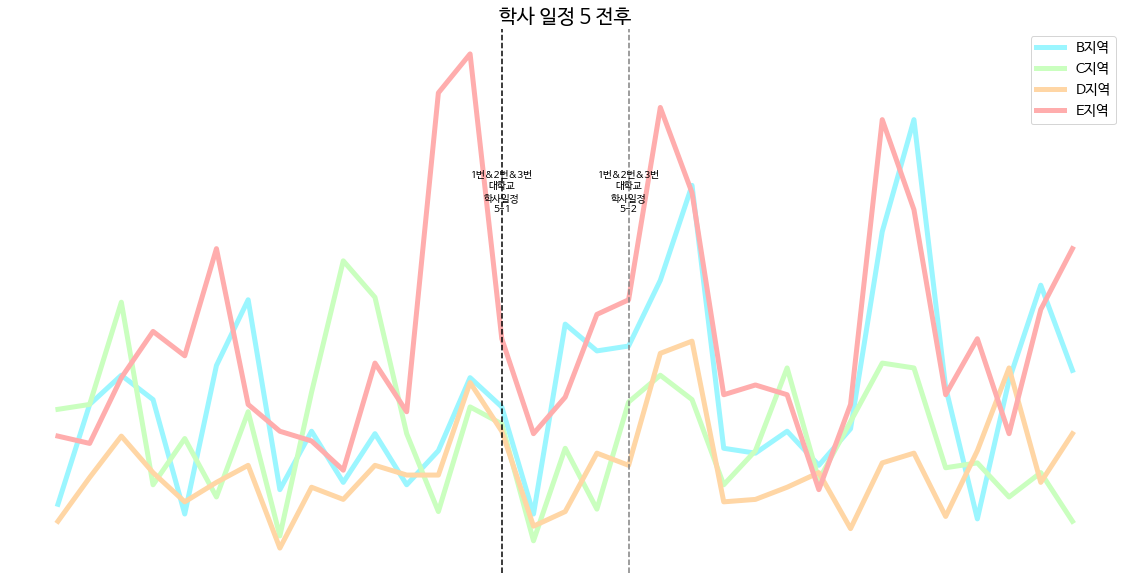

In [168]:
plt.figure(figsize=(20,10))

xaxis = pd.date_range('기간1', '기간2', freq='D')

plt.plot(xaxis, 일정5_지역B데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#9bf6ff" ,linewidth = 5, label = "B지역")
plt.plot(xaxis, 일정5_지역C데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#caffbf" ,linewidth = 5, label = "C지역")
plt.plot(xaxis, 일정5_지역D데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffd6a5" ,linewidth = 5, label = "D지역")
plt.plot(xaxis, 일정4_지역E데이터.groupby(["month","day"]).sum().reset_index().iloc[:,3], color = "#ffadad" ,linewidth = 5, label = "E지역")

plt.text(xaxis[14],150,'1번&2번&3번\n대학교\n학사일정\n5-1', ha = "center")
plt.axvline(x= xaxis[14], linestyle='--', color='black')

plt.text(xaxis[18],150,'1번&2번&3번\n대학교\n학사일정\n5-2', ha = "center")
plt.axvline(x= xaxis[18], linestyle='--', color='grey')

plt.title("학사 일정 5 전후", fontsize=20)
plt.axis("off")
plt.legend(fontsize=14)

plt.show()

## 결론
- 다양한 학사일정 중 학사 일정 2, 학사 일정 4, 학사 일정 5가 특정 연령대 쏘카 사용량에 영향을 주는 것을 알 수 있었음
- 그래프를 통해 분석에 사용된 세 학교의 일정이 동시에 진행될 수록 쏘카 사용량에 영향을 미치는 것을 볼 수 있었음